In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [3]:
#ally_direct = pd.read_csv("./alliances/alliance_v4.1_by_directed.csv")
#ally_direct_year = pd.read_csv("/alliances/alliance_v4.1_by_directed_yearly.csv")
ally_dyad = pd.read_csv("./alliances/alliance_v4.1_by_dyad.csv")
#ally_dyad_year = pd.read_csv("/alliances/alliance_v4.1_by_dyad_yearly.csv")
#ally_member = pd.read_csv("/alliances/alliance_v4.1_by_member.csv")
#ally_member_year = pd.read_csv("/alliances/alliance_v4.1_by_member_yearly.csv")

In [4]:
ally_dyad.info()
#Extra column 'asymmetric' if the alliance only applies one way
ally_dyad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version4id      3222 non-null   int64  
 1   ccode1          3222 non-null   int64  
 2   state_name1     3222 non-null   object 
 3   ccode2          3222 non-null   int64  
 4   state_name2     3222 non-null   object 
 5   dyad_st_day     3222 non-null   int64  
 6   dyad_st_month   3222 non-null   int64  
 7   dyad_st_year    3222 non-null   int64  
 8   dyad_end_day    1626 non-null   float64
 9   dyad_end_month  1626 non-null   float64
 10  dyad_end_year   1626 non-null   float64
 11  left_censor     3222 non-null   int64  
 12  right_censor    3222 non-null   int64  
 13  defense         3222 non-null   int64  
 14  neutrality      3222 non-null   int64  
 15  nonaggression   3222 non-null   int64  
 16  entente         3221 non-null   float64
 17  asymmetric      3222 non-null   i

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1,0.0,0,4.1
1,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0,1.0,0,4.1
2,3,240,Hanover,245,Bavaria,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1
3,3,240,Hanover,245,Bavaria,29,11,1850,15.0,6.0,1866.0,0,0,1,0,1,1.0,0,4.1
4,3,240,Hanover,255,Germany,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1,1.0,0,4.1


In [25]:
print("There are",ally_dyad['version4id'].nunique(),"alliances in the dataset.")

There are 414 alliances in the dataset.


In [6]:
ally_dyad.isnull().sum()

version4id           0
ccode1               0
state_name1          0
ccode2               0
state_name2          0
dyad_st_day          0
dyad_st_month        0
dyad_st_year         0
dyad_end_day      1596
dyad_end_month    1596
dyad_end_year     1596
left_censor          0
right_censor         0
defense              0
neutrality           0
nonaggression        0
entente              1
asymmetric           0
version              0
dtype: int64

In [7]:
# The entry with a missing value
ally_dyad[ally_dyad['entente'].isnull()]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
352,122,630,Iran,640,Turkey,22,4,1926,8.0,7.0,1937.0,0,0,0,1,1,NaN,0,4.1


In [8]:
# Value missing from alliance_direct
ally_dyad[ally_dyad['version4id'] == 6]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
94,6,200,United Kingdom,255,Germany,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
95,6,200,United Kingdom,300,Austria-Hungary,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
96,6,200,United Kingdom,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
97,6,255,Germany,300,Austria-Hungary,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
98,6,255,Germany,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1
99,6,300,Austria-Hungary,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,0,1.0,0,4.1


In [9]:
# Alliances starting prior to 1816
ally_dyad[ally_dyad['left_censor'] == 1]

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,asymmetric,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1,0.0,0,4.1
1,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0,1.0,0,4.1
20,3,245,Bavaria,255,Germany,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
22,3,245,Bavaria,267,Baden,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
24,3,245,Bavaria,269,Saxony,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
26,3,245,Bavaria,271,Wuerttemburg,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
28,3,245,Bavaria,273,Hesse Electoral,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
30,3,245,Bavaria,275,Hesse Grand Ducal,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
34,3,245,Bavaria,300,Austria-Hungary,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1
36,3,255,Germany,267,Baden,1,1,1816,15.0,3.0,1848.0,1,0,1,0,1,1.0,0,4.1


In [10]:
# Converting the 0 / 1 to be True and False
#ally_dyad['asymmetric'] = ally_dyad['asymmetric'].astype(bool)

# Count asymmetric alliances
asymmetric_count = ally_dyad['asymmetric'].sum()
symmetric_count = len(ally_dyad) - asymmetric_count

print("Number of asymmetric alliances:", asymmetric_count)
print("Number of symmetric alliances:", symmetric_count)

Number of asymmetric alliances: 245
Number of symmetric alliances: 2977


In [11]:
print("There are ",ally_dyad['left_censor'].sum(), " alliances that started prior to 1816, which is ", ally_dyad['left_censor'].sum()/len(ally_dyad)*100, "% of the alliances.")

print(max(ally_dyad['version']))

There are  38  alliances that started prior to 1816, which is  1.1793916821849781 % of the alliances.
4.1


In [12]:
# Count the number of alliances per country
counts1 = ally_dyad['state_name1'].value_counts()
counts2 = ally_dyad['state_name2'].value_counts()
counts = counts1.add(counts2, fill_value=0).astype(int)

# Create a dataframe with the number of alliances per country
alliance_per_country = pd.DataFrame({'state_name': counts.index, 'no_of_alliances': counts.values})
alliance_per_country.head()

,state_name,no_of_alliances
0,Afghanistan,15
1,Albania,13
2,Algeria,50
3,Angola,28
4,Antigua & Barbuda,44


In [13]:
# Most alliances
print(alliance_per_country.loc[alliance_per_country['no_of_alliances'].idxmax()]['state_name'], " has the most alliances with ", alliance_per_country['no_of_alliances'].max(), " alliances.\n")

# Least alliances
min_states = alliance_per_country[alliance_per_country['no_of_alliances'] == alliance_per_country['no_of_alliances'].min()]

print("The states:", ', '.join(min_states['state_name'].values), " have the least alliances with only", alliance_per_country['no_of_alliances'].min(),"alliance.")

Russia  has the most alliances with  167  alliances.

The states: Bangladesh, Eritrea, Indonesia, Korea, Malaysia, Mauritius, Modena, Parma, South Sudan, Swaziland, Taiwan, Tuscany  have the least alliances with only 1 alliance.


In [14]:
# The average duration of an alliance

durations = pd.DataFrame({'version4id':ally_dyad['version4id'], 'state_name1':ally_dyad['state_name1'], 'state_name2':ally_dyad['state_name2'], 'duration':ally_dyad['dyad_end_year'] - ally_dyad['dyad_st_year']})

durations.head()

,version4id,state_name1,state_name2,duration
0,1,United Kingdom,Portugal,NaN
1,2,United Kingdom,Sweden,95.0
2,3,Hanover,Bavaria,10.0
3,3,Hanover,Bavaria,16.0
4,3,Hanover,Germany,10.0


In [15]:
total_ongoing_alliances = durations['duration'].isna().sum()
duration_count = len(durations)
print("There are", total_ongoing_alliances, "alliances in the dataset out of the",duration_count,"that have not ended which is",total_ongoing_alliances/duration_count*100,"%\n")

duration_mean = durations['duration'].mean()
duration_mode = durations['duration'].mode()
duration_median = durations['duration'].median()


print("Max: {} years\nMean: {} years\nMedian: {} years\nMode: {} years".format(max(durations['duration'].dropna()), duration_mean.round(),duration_median,duration_mode.values[0]))


There are 1596 alliances in the dataset out of the 3222 that have not ended which is 49.534450651769085 %

Max: 95.0 years
Mean: 9.0 years
Median: 5.0 years
Mode: 2.0 years


Number of modes: 1
The distribution is unimodal.


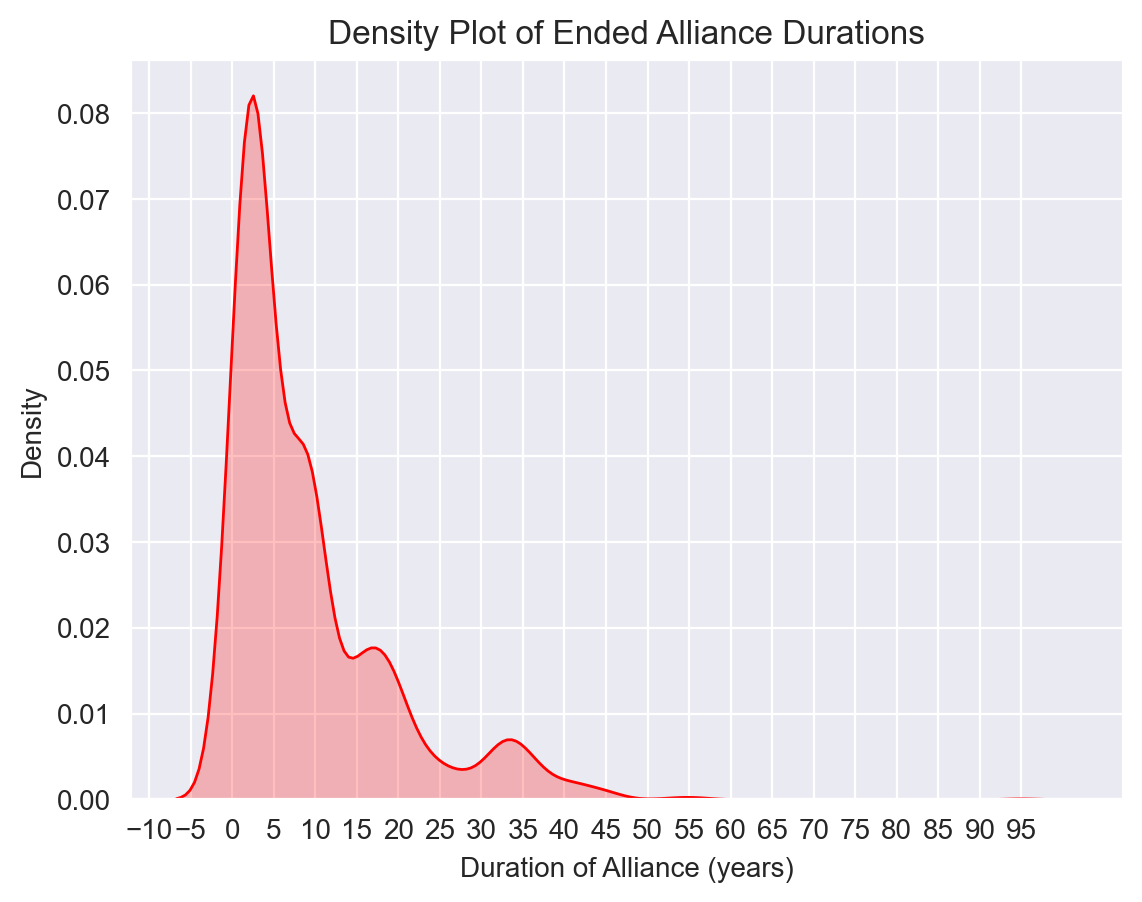

In [16]:
# Plot the kernel density estimation (KDE) plot
sns.kdeplot(durations['duration'], fill=True, color='red')
plt.xlabel('Duration of Alliance (years)')
plt.ylabel('Density')
plt.title('Density Plot of Ended Alliance Durations')

# Determine the number of modes
num_modes = len(duration_mode)

# Print the number of modes
print("Number of modes:", num_modes)

# Determine if the distribution is unimodal, bimodal, or multimodal
if num_modes == 1:
    print("The distribution is unimodal.")
elif num_modes == 2:
    print("The distribution is bimodal.")
else:
    print("The distribution is multimodal.")

plt.xticks(range(-10,100,5))
plt.show()


In [17]:
# On going alliances duration as of 31/12/12

valid_alliances = ally_dyad[ally_dyad['right_censor'] == 1]

valid_durations = pd.DataFrame({'version4id':valid_alliances['version4id'], 'state_name1':valid_alliances['state_name1'], 'state_name2':valid_alliances['state_name2'], 'duration':2013 - valid_alliances['dyad_st_year']})

valid_durations.head()

,version4id,state_name1,state_name2,duration
0,1,United Kingdom,Portugal,197
279,88,Ecuador,Bolivia,102
670,170,Bolivia,Paraguay,75
696,185,Colombia,Venezuela,74
915,199,Mauritania,Somalia,39


In [18]:
valid_duration_mean = valid_durations['duration'].mean()
valid_duration_mode = valid_durations['duration'].mode()
valid_duration_median = valid_durations['duration'].median()


print("Max: {} years\nMean: {} years\nMedian: {} years\nMode: {} years".format(max(valid_durations['duration']), valid_duration_mean.round(),valid_duration_median,valid_duration_mode.values[0]))

Max: 197 years
Mean: 36.0 years
Median: 32.0 years
Mode: 66 years


Number of modes: 1
The distribution is unimodal.


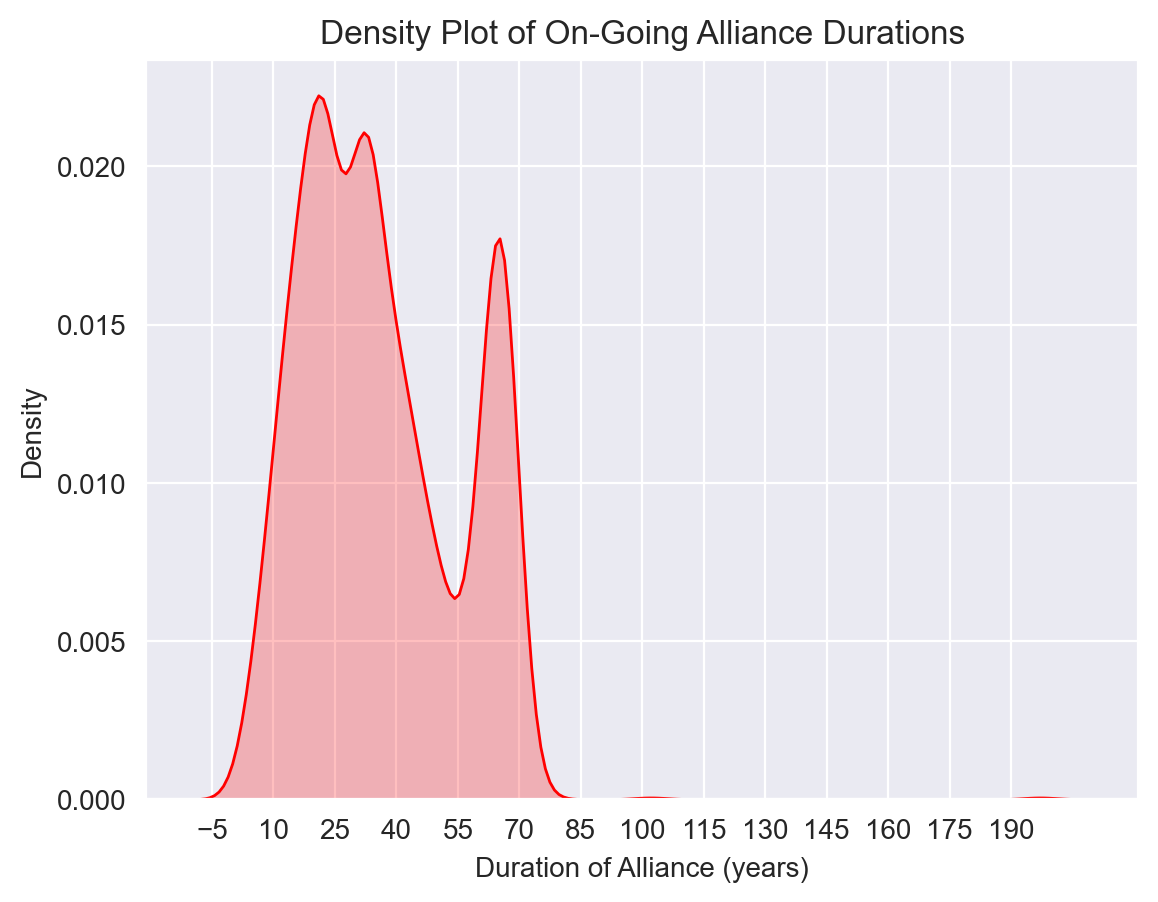

duration
66     190
32     184
24      74
13      73
22      71
18      70
64      66
21      64
42      61
7       56
34      53
23      51
14      51
46      41
49      40
38      40
17      33
29      31
31      30
39      30
62      28
36      24
44      22
52      22
11      22
55      16
25      15
40      15
60      15
41      15
58      12
65      10
68      10
20       9
51       9
19       7
12       5
61       5
59       5
54       3
15       2
8        2
16       2
5        1
4        1
6        1
197      1
9        1
50       1
53       1
63       1
102      1
74       1
75       1
3        1
Name: count, dtype: int64

In [19]:
# Plot the kernel density estimation (KDE) plot
sns.kdeplot(valid_durations['duration'], fill=True,color='red')
plt.xlabel('Duration of Alliance (years)')
plt.ylabel('Density')
plt.title('Density Plot of On-Going Alliance Durations')

# Determine the number of modes
num_modes = len(valid_duration_mode)

# Print the number of modes
print("Number of modes:", num_modes)

# Determine if the distribution is unimodal, bimodal, or multimodal
if num_modes == 1:
    print("The distribution is unimodal.")
elif num_modes == 2:
    print("The distribution is bimodal.")
else:
    print("The distribution is multimodal.")

plt.xticks(range(-5,200,15))
plt.show()
valid_durations['duration'].value_counts()

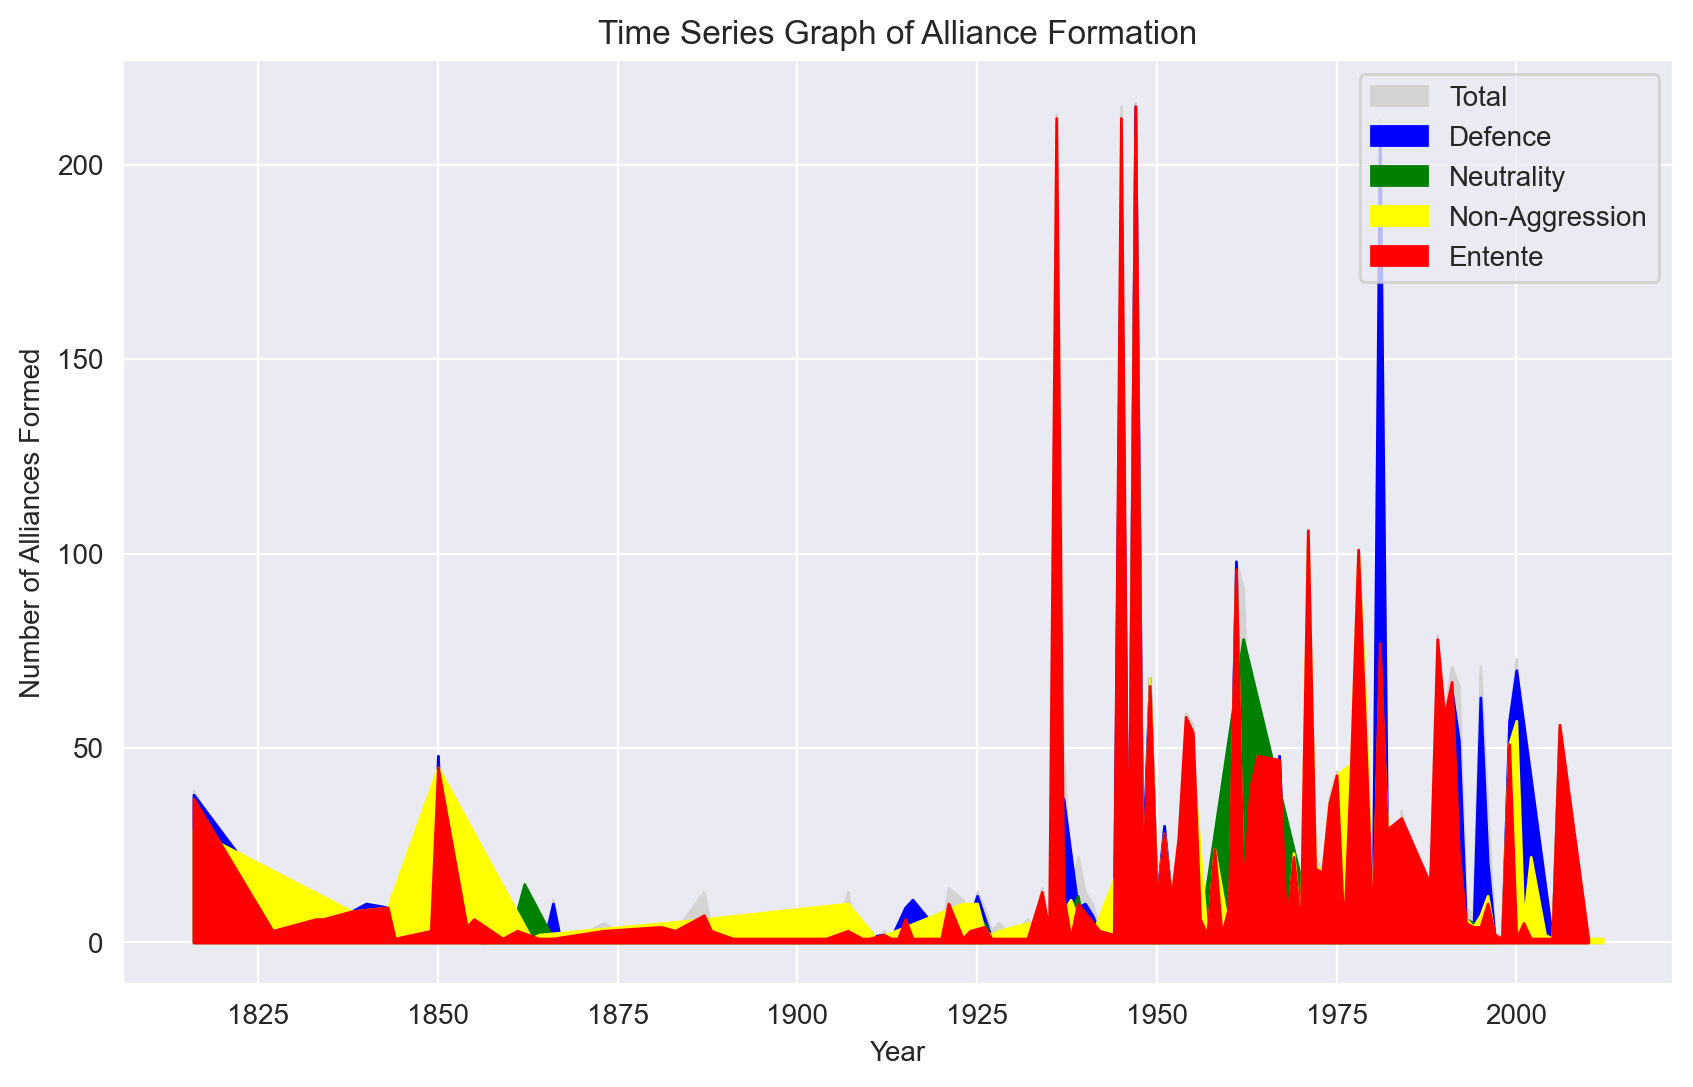

Mean 1956
Median 1962
Mode 1947


In [52]:
# Temporal plot of alliance formation

# Filter the dataframe for each alliance type
defense_alliances = ally_dyad[ally_dyad['defense'] == True]
neutrality_alliances = ally_dyad[ally_dyad['neutrality'] == True]
non_aggression_alliances = ally_dyad[ally_dyad['nonaggression'] == True]
entente_alliances = ally_dyad[ally_dyad['entente'] == True]

# Plot the temporal analysis graph
plt.figure(figsize=(10, 6))
plt.fill_between(ally_dyad['dyad_st_year'].value_counts().sort_index().index,
                 ally_dyad['dyad_st_year'].value_counts().sort_index().values,
                 color='lightgrey', label='Total')
plt.fill_between(defense_alliances['dyad_st_year'].value_counts().sort_index().index,
                defense_alliances['dyad_st_year'].value_counts().sort_index().values,
                 color='blue', label='Defence')
plt.fill_between(neutrality_alliances['dyad_st_year'].value_counts().sort_index().index,
                 neutrality_alliances['dyad_st_year'].value_counts().sort_index().values,
                 color='green', label='Neutrality')
plt.fill_between(non_aggression_alliances['dyad_st_year'].value_counts().sort_index().index,
                 non_aggression_alliances['dyad_st_year'].value_counts().sort_index().values,
                 color='yellow', label='Non-Aggression')
plt.fill_between(entente_alliances['dyad_st_year'].value_counts().sort_index().index,
                entente_alliances['dyad_st_year'].value_counts().sort_index().values,
                color='red', label='Entente')


plt.xlabel('Year')
plt.ylabel('Number of Alliances Formed')
plt.title('Time Series Graph of Alliance Formation')
plt.legend()
plt.grid(True)
plt.show()

print("Mean {}\nMedian {}\nMode {}".format(int(ally_dyad['dyad_st_year'].mean().round()),int(ally_dyad['dyad_st_year'].median()),ally_dyad['dyad_st_year'].mode().values[0]))

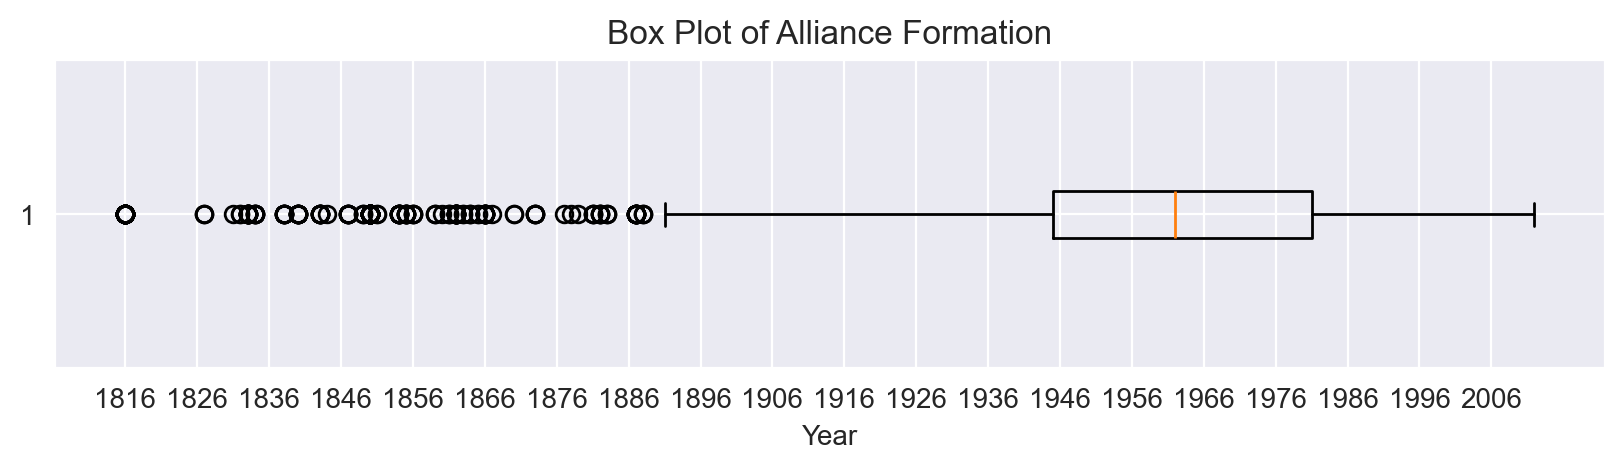

In [53]:
plt.figure(figsize=(10, 2))
plt.boxplot(ally_dyad['dyad_st_year'],vert=0)
plt.xlabel('Year')
plt.xticks(range(1816,2012,10))
plt.title('Box Plot of Alliance Formation')
plt.show()

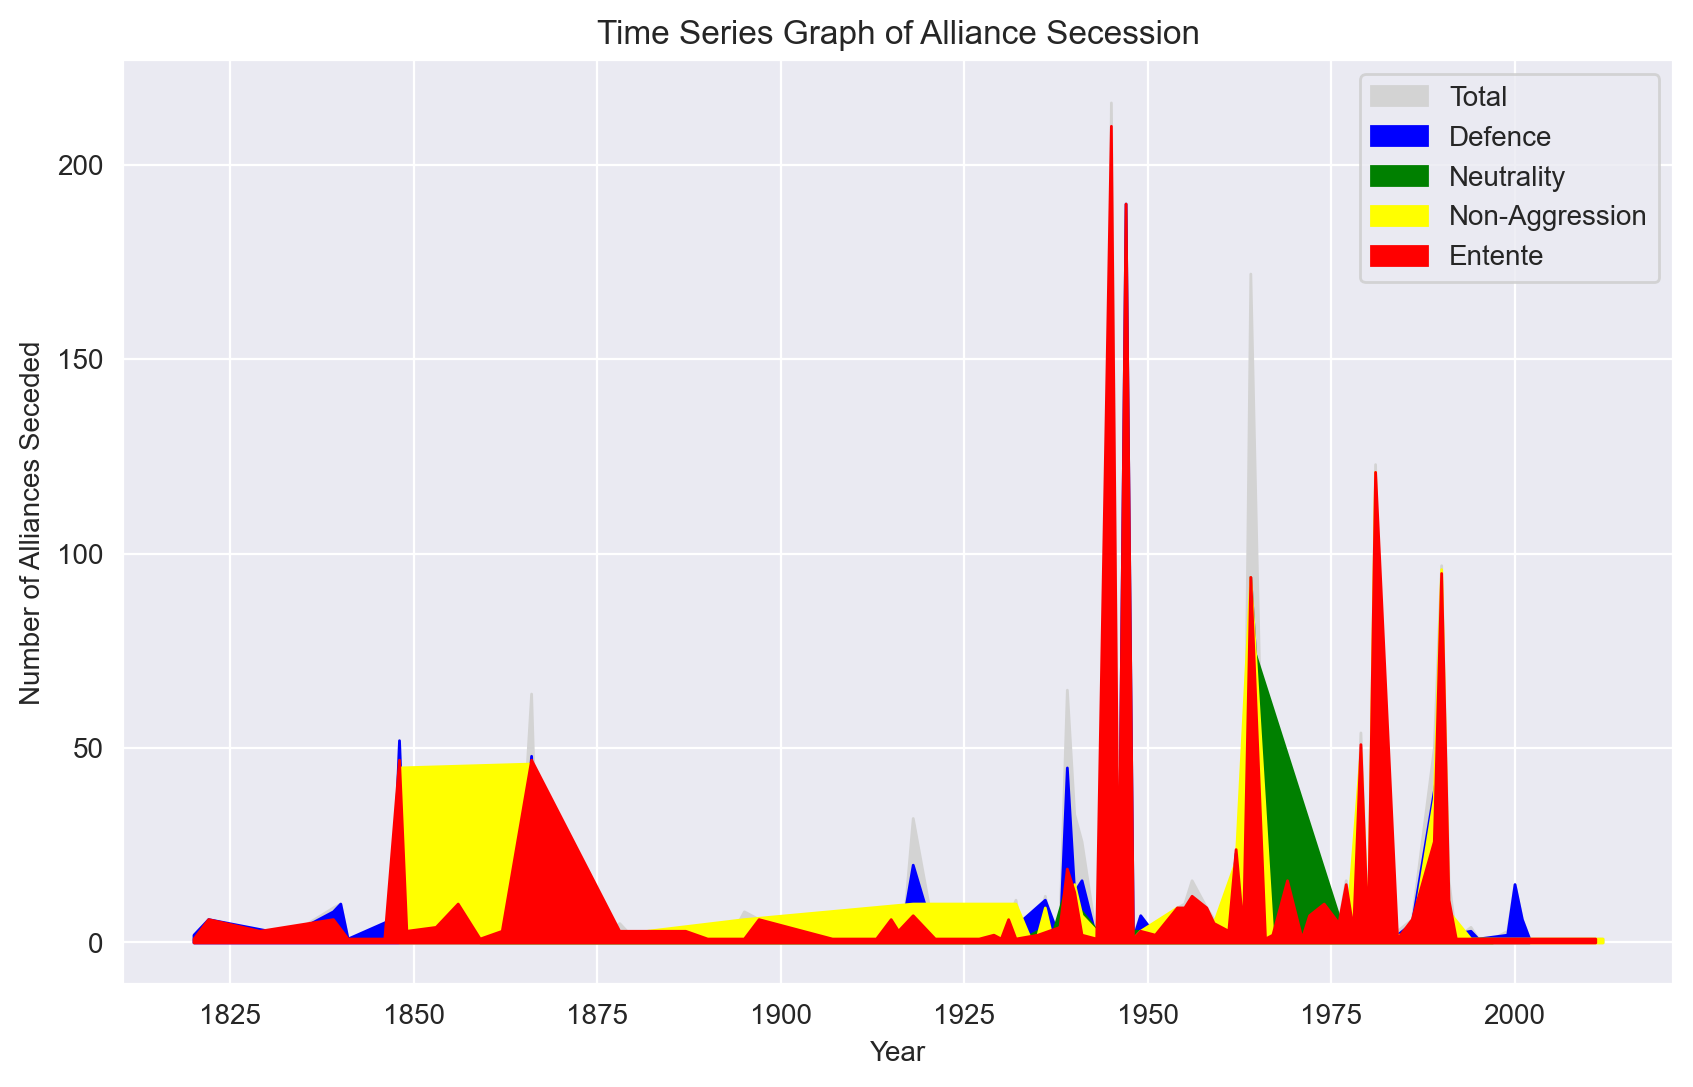

Mean 1944
Median 1947
Mode 1945.0


In [54]:
# Temporal plot of alliance formation

# Filter the dataframe for each alliance type
defense_alliances = ally_dyad[ally_dyad['defense'] == True]
neutrality_alliances = ally_dyad[ally_dyad['neutrality'] == True]
non_aggression_alliances = ally_dyad[ally_dyad['nonaggression'] == True]
entente_alliances = ally_dyad[ally_dyad['entente'] == True]

# Plot the temporal analysis graph
plt.figure(figsize=(10, 6))
plt.fill_between(ally_dyad['dyad_end_year'].value_counts().sort_index().index,
                 ally_dyad['dyad_end_year'].value_counts().sort_index().values,
                 color='lightgrey', label='Total')
plt.fill_between(defense_alliances['dyad_end_year'].value_counts().sort_index().index,
                defense_alliances['dyad_end_year'].value_counts().sort_index().values,
                 color='blue', label='Defence')
plt.fill_between(neutrality_alliances['dyad_end_year'].value_counts().sort_index().index,
                 neutrality_alliances['dyad_end_year'].value_counts().sort_index().values,
                 color='green', label='Neutrality')
plt.fill_between(non_aggression_alliances['dyad_end_year'].value_counts().sort_index().index,
                 non_aggression_alliances['dyad_end_year'].value_counts().sort_index().values,
                 color='yellow', label='Non-Aggression')
plt.fill_between(entente_alliances['dyad_end_year'].value_counts().sort_index().index,
                entente_alliances['dyad_end_year'].value_counts().sort_index().values,
                color='red', label='Entente')


plt.xlabel('Year')
plt.ylabel('Number of Alliances Seceded')
plt.title('Time Series Graph of Alliance Secession')
plt.legend()
plt.grid(True)
plt.show()

print("Mean {}\nMedian {}\nMode {}".format(int(ally_dyad['dyad_end_year'].mean().round()),int(ally_dyad['dyad_end_year'].median()),ally_dyad['dyad_end_year'].mode().values[0]))

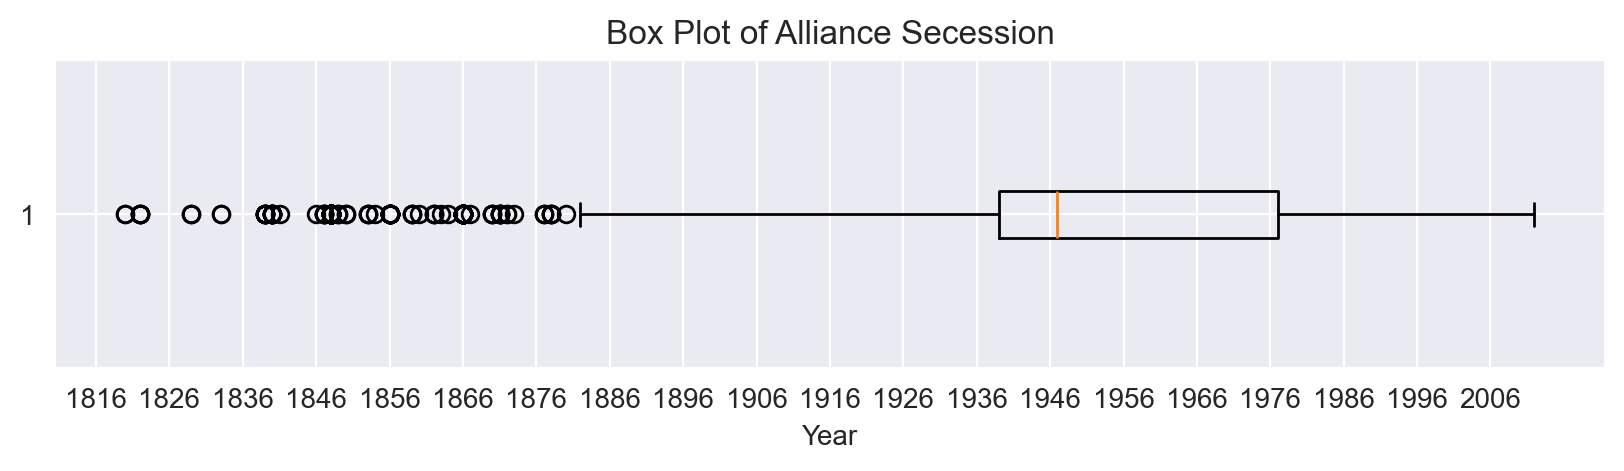

In [55]:
plt.figure(figsize=(10, 2))
plt.boxplot((ally_dyad[ally_dyad['dyad_end_year'].notnull()])['dyad_end_year'],vert=0)
plt.xlabel('Year')
plt.xticks(range(1816,2012,10))
plt.title('Box Plot of Alliance Secession')
plt.show()